In [1]:
import numpy as np
from numpy.random import randn

In [2]:
pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
plot(np.arange(10))

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt

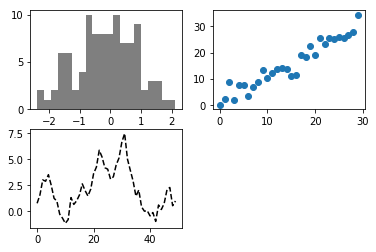

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1) # 图像2*2,编号为1
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

from numpy.random import randn
plt.plot(np.random.randn(50).cumsum(),'k--') # k-- : 黑色虚线 
ax1.hist(randn(100),bins=20,color='k',alpha=0.5)#bins是分割条数, alpha是颜色的深度
ax2.scatter(np.arange(30),np.arange(30) + 3 * randn(30))# x,y
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206C68784E0>,
      dtype=object)

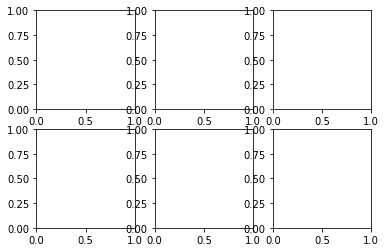

In [6]:
fig,axes = plt.subplots(2,3)# 2行3列
axes

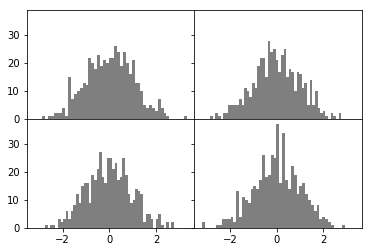

In [7]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500),bins=50,color='k',alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

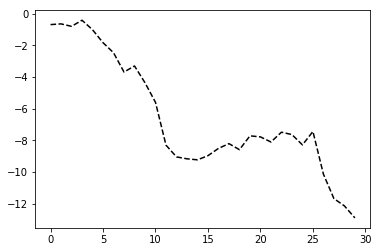

In [8]:
data = randn(30).cumsum()
plt.plot(data,'k--',label='Default')

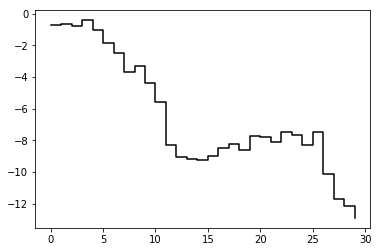

In [9]:
plt.plot(data,'k-',drawstyle='steps-post',label='steps-post')

No handles with labels found to put in legend.


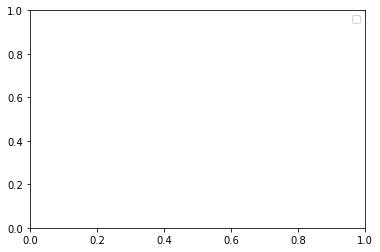

In [10]:
plt.legend(loc='best')

(0.0, 1.0)

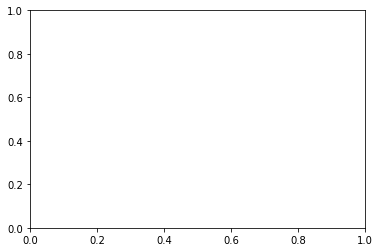

In [11]:
plt.xlim() #x轴绘图范围

(0, 10)

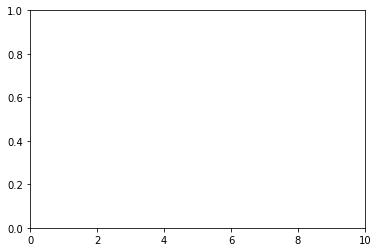

In [12]:
plt.xlim([0,10])

Text(0.5,0,'Stages')

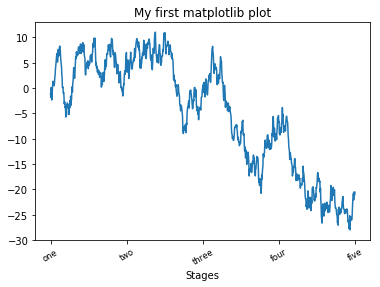

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])# x轴刻度的位置
labels = ax.set_xticklabels(['one','two','three','four','five']
                            ,rotation=30,fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

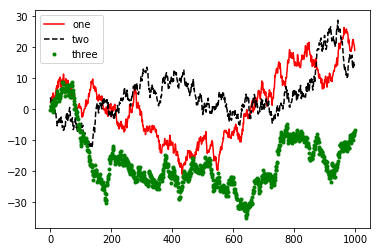

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'r',label='one')
ax.plot(randn(1000).cumsum(),'k--',label='two')
ax.plot(randn(1000).cumsum(),'g.',label='three')
plt.legend(loc='best')# 自动创建图例

In [33]:
from datetime import datetime
import pandas as pd

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

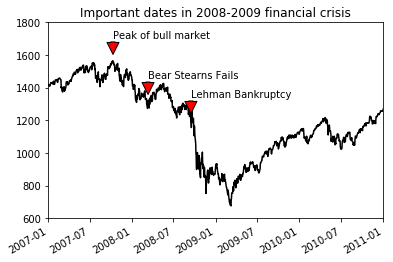

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('dataset/spx.csv',index_col=0,parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax,style='k-')

crisis_data = [
    (datetime(2007,10,11),'Peak of bull market'),
    (datetime(2008,3,12),'Bear Stearns Fails'),
    (datetime(2008,9,15),'Lehman Bankruptcy')
]

for date,label in crisis_data:
    ax.annotate(label,
                xy=(date,spx.asof(date) + 50),
                xytext=(date,spx.asof(date) + 200),
                arrowprops=dict(facecolor='red'),
                horizontalalignment='left',
                verticalalignment='top')
# 放大到2007到2010
ax.set_xlim(['1/1/2007','1/1/2011'])
ax.set_ylim([600,1800])
ax.set_title('Important dates in 2008-2009 financial crisis')


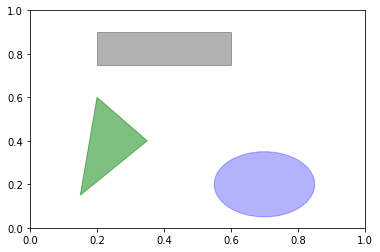

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75),0.4,0.15,color='k',alpha=0.3)
circ = plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon = plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('fig.png',dpi=400,bbox_inches='tight')

In [23]:
plt.rc('figure',figsize=(10,10))# 全局配置

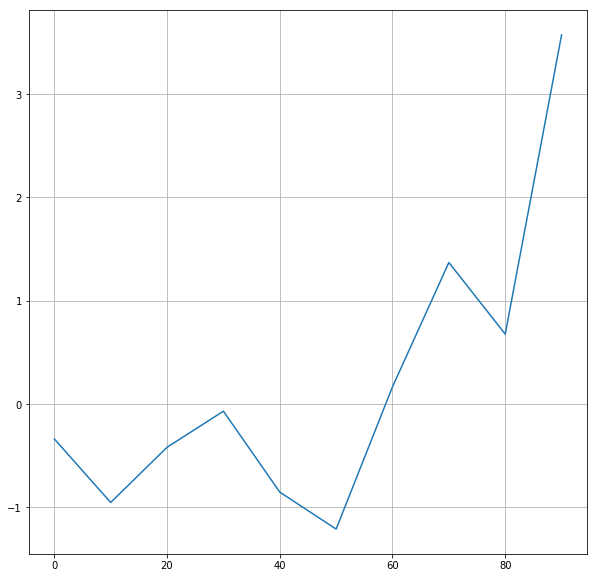

In [28]:
# 利用Series内置的函数绘图
from pandas import Series,DataFrame
s = Series(randn(10).cumsum(),index=np.arange(0,100,10))
s.plot(grid=True)

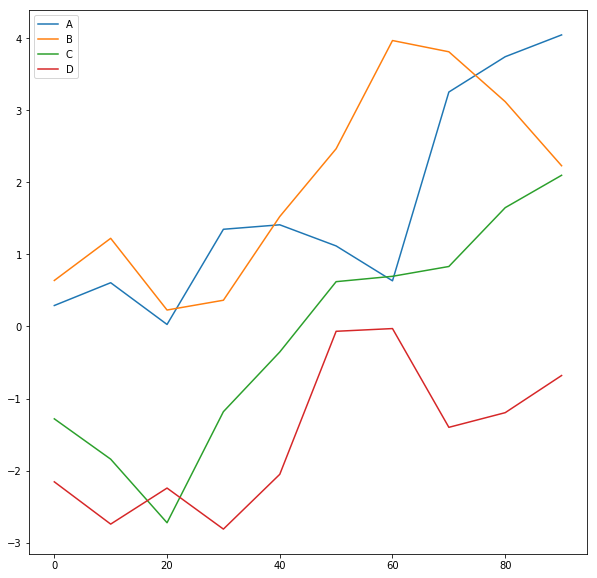

In [34]:
# 每一列绘制一条线
df = DataFrame(randn(10,4).cumsum(0),columns=['A','B','C','D'],
              index=np.arange(0,100,10))
df.plot()

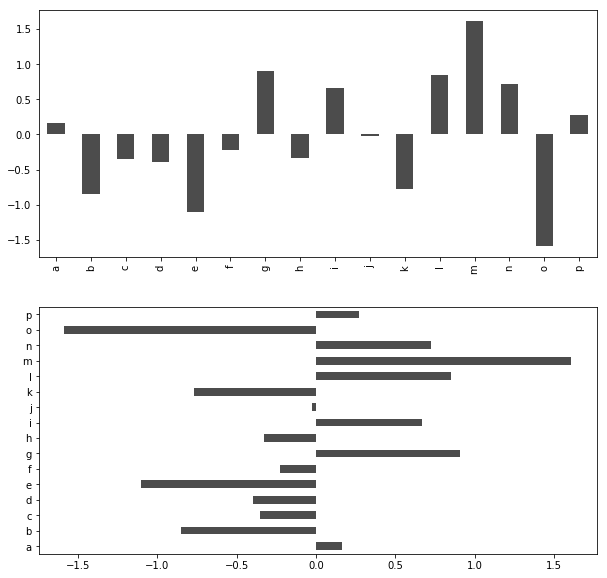

In [31]:
fig,axes = plt.subplots(2,1)
data = Series(randn(16),index=list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.7)
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)

In [37]:
df = DataFrame(randn(6,4),
               index=['one','two','three','four','five','six'],
               columns=pd.Index(['A','B','C','D'],name='Genus'))
df

Genus,A,B,C,D
one,1.752492,-0.270544,-0.640687,0.535438
two,0.401137,0.277711,0.294628,1.472214
three,-0.241162,-0.034955,0.996553,2.467303
four,-0.248006,-2.827793,0.149347,-1.854389
five,-0.303219,-0.609451,-0.572757,-0.125119
six,-0.054535,1.366671,-0.159754,0.530447


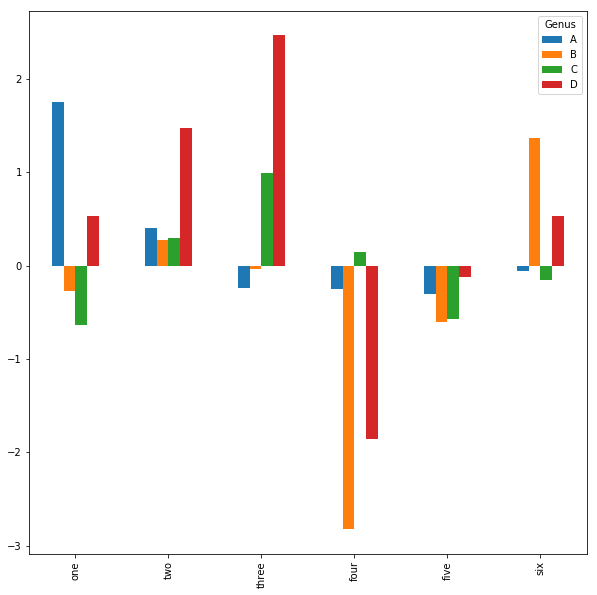

In [38]:
df.plot(kind='bar')

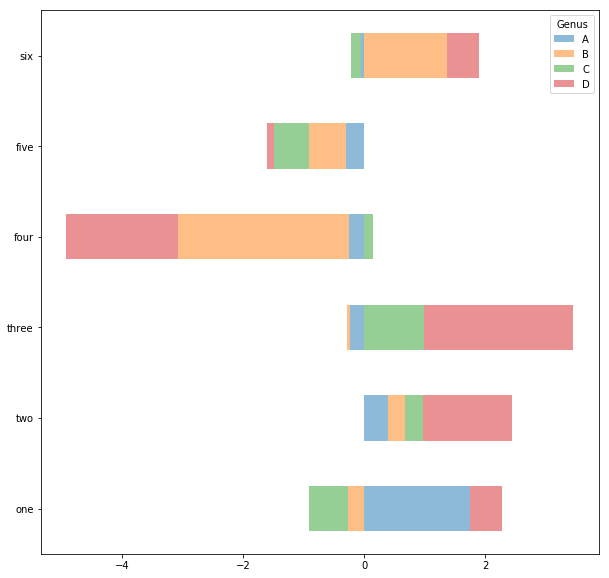

In [39]:
df.plot(kind='barh',stacked=True,alpha=0.5)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


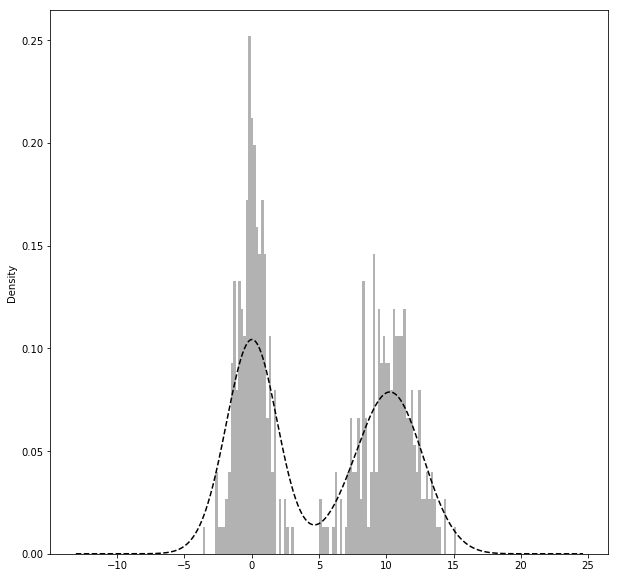

In [51]:
comp1 = np.random.normal(0,1,size=200)  #N(0,1)
comp2 = np.random.normal(10,2,size=200) #N(10,4)
values = Series(np.concatenate([comp1,comp2]))
values.hist(bins=100,alpha=0.3,color='k',normed=True)
values.plot(kind='kde',style='k--')

In [53]:
macro = pd.read_csv('dataset/macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


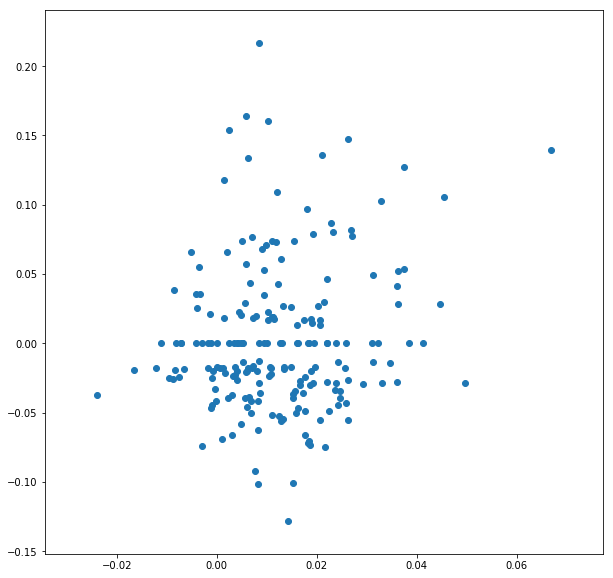

In [54]:
plt.scatter(trans_data['m1'],trans_data['unemp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206C928EB70>,
      dtype=object)

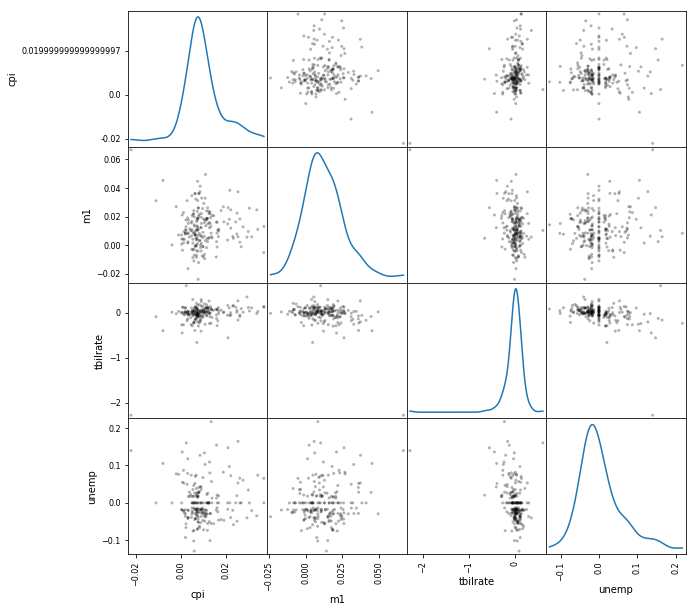

In [58]:
pd.plotting.scatter_matrix(trans_data,diagonal='kde',color='k',alpha=0.3)

In [60]:
data = pd.read_csv('dataset/Haiti.csv')
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [62]:
data[['INCIDENT TITLE','LATITUDE','LONGITUDE']][:10]

,INCIDENT TITLE,LATITUDE,LONGITUDE
0,* URGENT * Type O blood donations needed in #J...,18.233333,-72.533333
1,"Food-Aid sent to Fondwa, Haiti",50.226029,5.729886
2,how haiti is right now and how it was during t...,22.278381,114.174287
3,Lost person,44.407062,8.933989
4,Citi Soleil school,18.571084,-72.334671
5,Radio Commerce in Sarthe,18.593707,-72.310079
6,Contaminated water in Baraderes.,18.482800,-73.638800
7,Violence at &quot;arcahaie bas Saint-Ard&quot;,18.415000,-73.195000
8,No electricity in pernier,18.517443,-72.236841
9,Shelter and food needed at Lamentin 54 and Rue...,18.547790,-72.410010


In [65]:
data[['CATEGORY']][:6]

,CATEGORY
0,"1. Urgences | Emergency, 3. Public Health,"
1,"1. Urgences | Emergency, 2. Urgences logistiqu..."
2,"2. Urgences logistiques | Vital Lines, 8. Autr..."
3,"1. Urgences | Emergency,"
4,"1. Urgences | Emergency,"
5,"5e. Communication lines down,"


In [66]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [69]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20)
           & (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
           & data.CATEGORY.notnull()]
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO


In [73]:
def to_cat_list(catstr):
    """
    获取所有分类的列表
    """
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in striped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code,names.strip()

get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [ ]:
all_cats = get_all_categories(data.CATEGORY)
